In [7]:
!pip install scikit-learn



   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.3 MB 342.2 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.3 MB 342.2 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.3 MB 342.2 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.3 MB 342.2 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.3 MB 342.2 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.3 MB 342

In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from itertools import cycle



In [9]:
# Load dataset
data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

# Binarize labels for multi-class ROC
unique_labels = np.unique(labels)
labels_bin = label_binarize(labels, classes=unique_labels)
n_classes = labels_bin.shape[1]




In [10]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels_bin, test_size=0.3, shuffle=True, stratify=labels)

# Train model
model = RandomForestClassifier(min_samples_leaf=30, random_state=42)
model.fit(x_train, y_train)



RandomForestClassifier(min_samples_leaf=30, random_state=42)

In [11]:
# Predict
y_predict_bin = model.predict(x_test)
y_predict = np.argmax(y_predict_bin, axis=1)
y_test1 = np.argmax(y_test, axis=1)

# Evaluate model
accuracy = accuracy_score(y_test1, y_predict)
precision = precision_score(y_test1, y_predict, average='weighted')
recall = recall_score(y_test1, y_predict, average='weighted')
f1 = f1_score(y_test1, y_predict, average='weighted')



In [12]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:\n', classification_report(y_test1, y_predict))



Accuracy: 95.97%
Precision: 0.98
Recall: 0.96
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.99      0.58       480
           1       1.00      0.96      0.98       480
           2       0.97      0.95      0.96       479
           3       1.00      0.97      0.99       479
           4       1.00      0.98      0.99       480
           5       1.00      0.95      0.98       480
           6       0.99      0.99      0.99       480
           7       1.00      0.97      0.99       480
           8       1.00      0.98      0.99       480
           9       0.99      0.95      0.97       480
          10       1.00      0.97      0.99       457
          11       1.00      0.99      0.99       474
          12       1.00      1.00      1.00       480
          13       1.00      0.98      0.99       480
          14       1.00      0.96      0.98       450
          15       1.00      0.97      0.98      

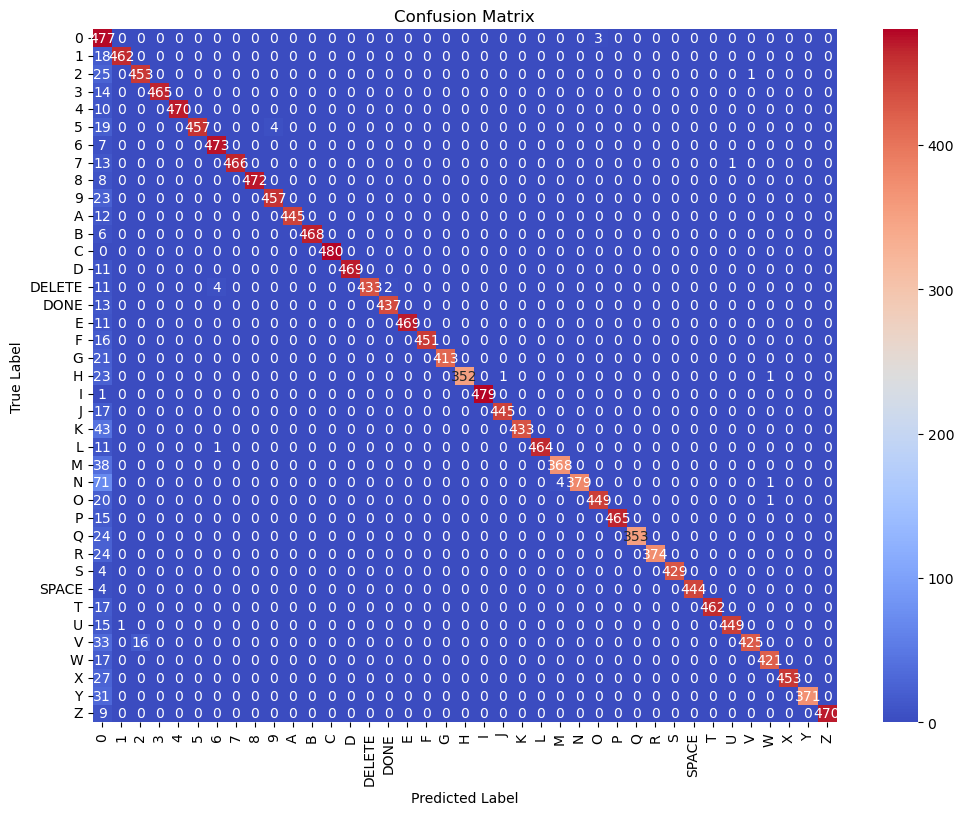

In [14]:
# Plot confusion matrix
plt.figure(figsize=(12, 9))
cm = confusion_matrix(y_test1, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save the plot in high quality
plt.savefig('confusion_matrix1200.png', dpi=1200, bbox_inches='tight')  # Can also use .pdf or .svg
plt.show()


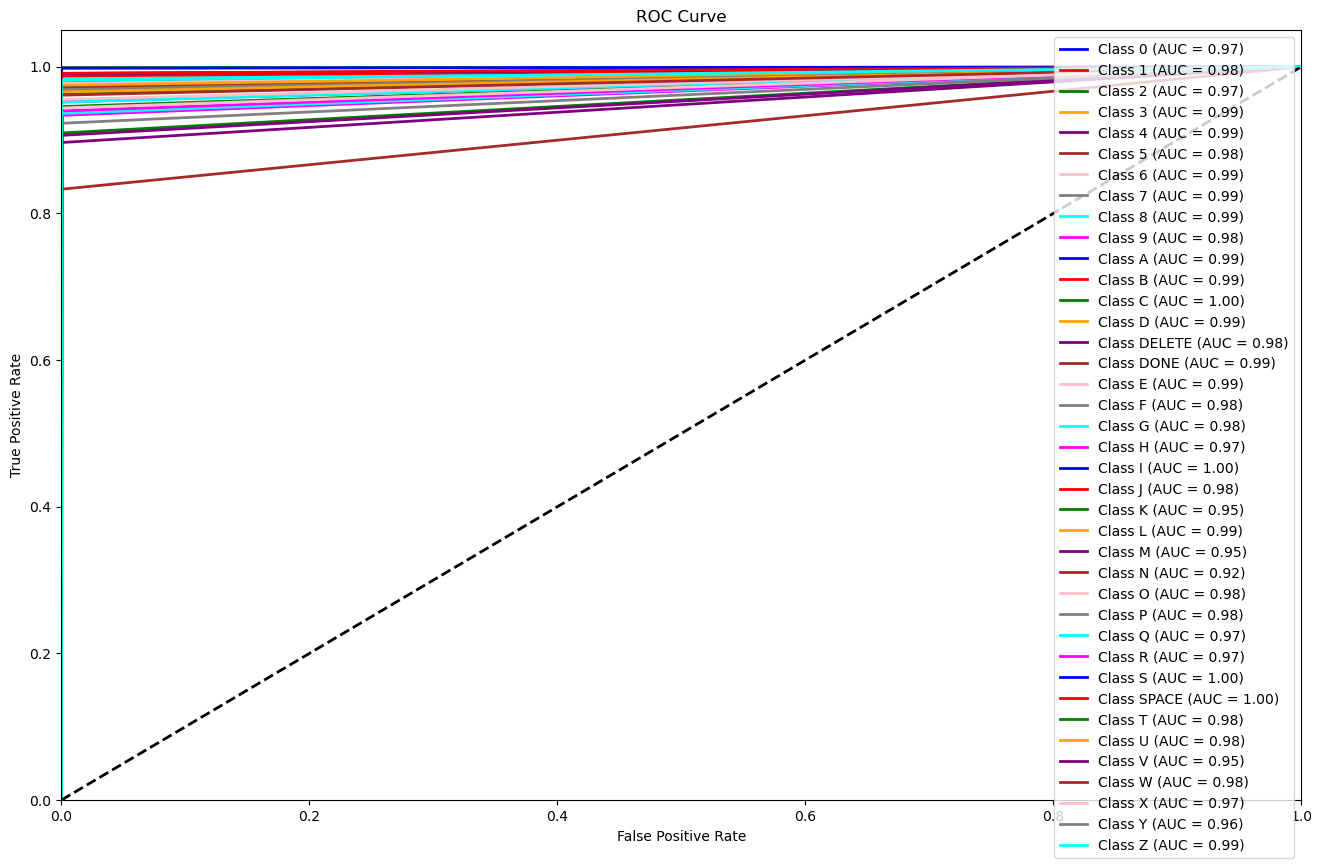

In [15]:
# Plot ROC Curve for each class
plt.figure(figsize=(16, 10))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
legend_labels = []  # Store valid legend labels

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_predict_bin[:, i])
    if np.any(fpr) and np.any(tpr):  # Ensure there is valid data
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {unique_labels[i]} (AUC = {roc_auc:.2f})')
        legend_labels.append(f'Class {unique_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

if legend_labels:  # Add legend only if labels exist
    plt.legend(loc='best')

# Save the figure in high resolution before showing it
plt.savefig('roc_curve1200.png', dpi=1200, bbox_inches='tight')  # You can also use .pdf or .svg
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5392\38211736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=[f'Feature {i}' for i in range(len(importances))], palette='viridis')


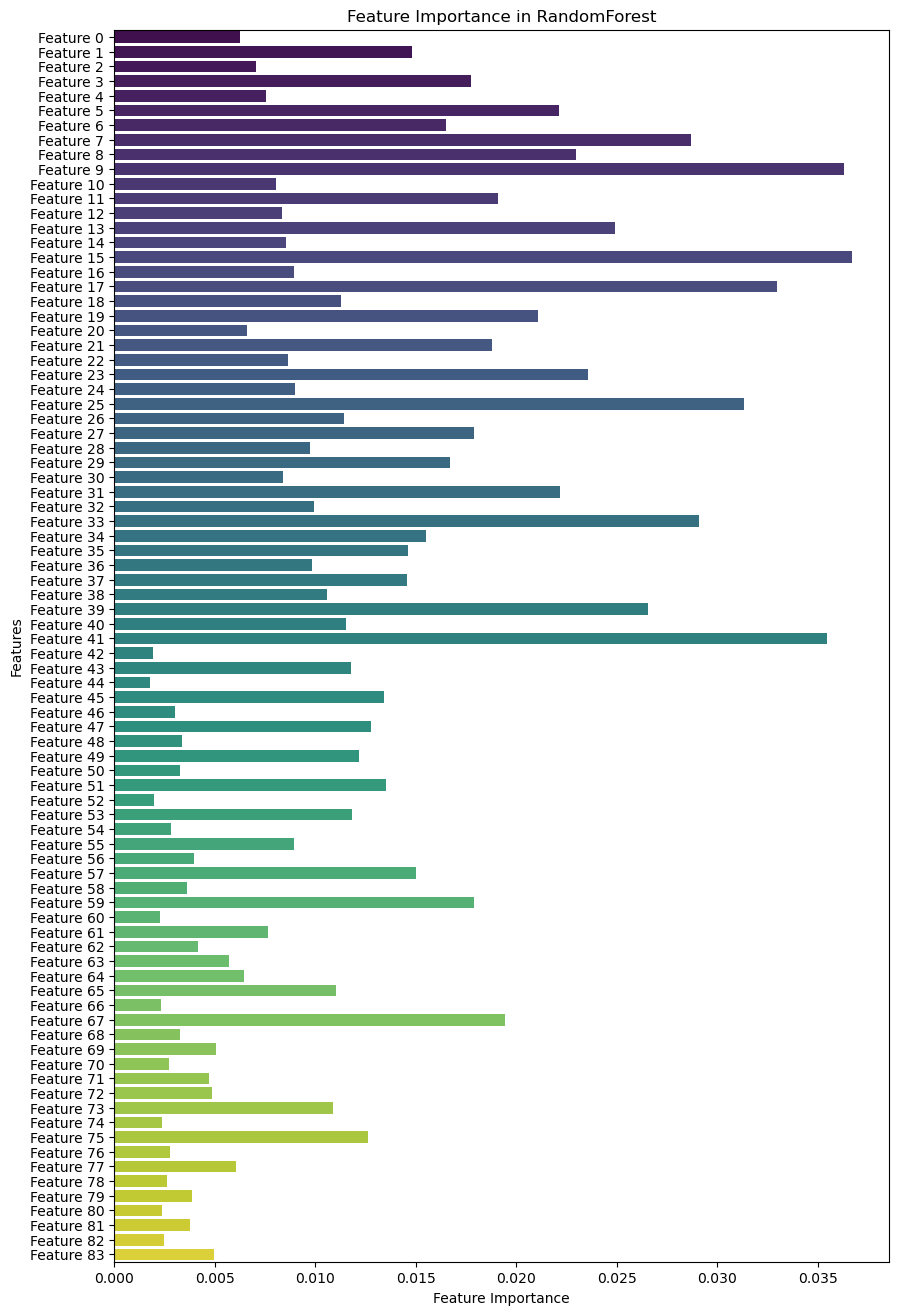

In [16]:
# Feature Importance Plot
plt.figure(figsize=(10, 16))
importances = model.feature_importances_
sns.barplot(x=importances, y=[f'Feature {i}' for i in range(len(importances))], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in RandomForest')

# Save the plot in high quality
plt.savefig('feature_importance1200.png', dpi=1200, bbox_inches='tight')  # You can also use .pdf or .svg
plt.show()


In [9]:
# Save model
with open('Final_model.p', 'wb') as f:
    pickle.dump({'Final_model': model}, f)